# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [79]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import scipy.stats as st
# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [57]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=2500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=2500)
lat_lngs = zip(lats, lngs)

lat_cities = []
lng_cities = []
# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
        lat_cities.append(lat_lng[0])
        lng_cities.append(lat_lng[1])


# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")
print(cities)


Number of cities in the list: 877
['albany', 'guateque', 'tual', 'grytviken', 'iqaluit', 'leava', 'anadyr', 'puerto san carlos', 'blackmans bay', 'nikolayevsk-on-amure', 'talnakh', 'alofi', 'yeppoon', 'jamestown', 'waitangi', 'bilibino', 'san andros', 'ilulissat', 'papatowai', 'bafoulabe', 'invercargill', 'edinburgh of the seven seas', 'ushuaia', 'tura', 'rebola', 'georgetown', 'avarua', 'cumaribo', 'chapeco', 'nikel', 'kavaratti', 'adamstown', 'hithadhoo', 'sao vicente', 'owen sound', 'curillo', 'bethel', 'port elizabeth', 'longyearbyen', 'taiohae', 'vilyuchinsk', 'fortuna', 'ribeira grande', 'puerto ayora', 'satipo', 'enewetak', 'podujeva', 'labrador city', 'sines', 'hiratacho', 'beau vallon', 'port-aux-francais', 'padre las casas', 'thompson', 'puerto natales', 'dalbandin', 'dharchula', 'letlhakeng', 'port isabel', 'olonkinbyen', 'yellowknife', 'devinuwara', 'sampit', 'lhasa', 'villa huidobro', 'taulaga', 'senanga', 'west bay', 'qoryooley', 'inhambane', 'southside', 'sukhothai', 'pe

---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [58]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    
    lat: lat_cities[i]
    lon: lng_cities[i]
    appid: weather_api_key

    city_url = f'{url}lat={lat_cities[i]}&lon={lng_cities[i]}&appid={weather_api_key}'
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    city_weather = requests.get(city_url).json()
    print(city_weather)
    try:
        # Parse the JSON and retrieve data

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        #city_date = # YOUR CODE HERE
        
        # Append the City information into city_data list
        city_data.append({"City": city, 
                         "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          #"Date": city_date
                          })

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | albany
{'coord': {'lon': 118.9807, 'lat': -34.029}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 289.24, 'feels_like': 288.37, 'temp_min': 289.24, 'temp_max': 289.24, 'pressure': 1013, 'humidity': 56, 'sea_level': 1013, 'grnd_level': 984}, 'visibility': 10000, 'wind': {'speed': 4.65, 'deg': 282, 'gust': 9.71}, 'clouds': {'all': 100}, 'dt': 1697918505, 'sys': {'country': 'AU', 'sunrise': 1697922883, 'sunset': 1697970137}, 'timezone': 28800, 'id': 2064165, 'name': 'Ongerup', 'cod': 200}
Processing Record 2 of Set 1 | guateque
{'coord': {'lon': -73.4211, 'lat': 4.67}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 288.59, 'feels_like': 288.44, 'temp_min': 288.59, 'temp_max': 288.59, 'pressure': 1012, 'humidity': 86, 'sea_level': 1012,

In [59]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          523
Lat           523
Lng           523
Max Temp      523
Humidity      523
Cloudiness    523
Wind Speed    523
Country       523
dtype: int64

In [60]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country
0,albany,-34.0290,118.9807,289.24,56,100,4.65,AU
1,guateque,4.6700,-73.4211,288.59,86,100,1.22,CO
2,tual,-5.6691,132.6724,299.97,83,44,6.59,ID
3,iqaluit,73.4561,-82.3580,257.56,82,5,2.64,CA
4,leava,-15.4123,-179.6290,299.57,84,100,5.04,FJ


In [62]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [63]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country
City_ID,,,,,,,,
0,albany,-34.0290,118.9807,289.24,56,100,4.65,AU
1,guateque,4.6700,-73.4211,288.59,86,100,1.22,CO
2,tual,-5.6691,132.6724,299.97,83,44,6.59,ID
3,iqaluit,73.4561,-82.3580,257.56,82,5,2.64,CA
4,leava,-15.4123,-179.6290,299.57,84,100,5.04,FJ


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

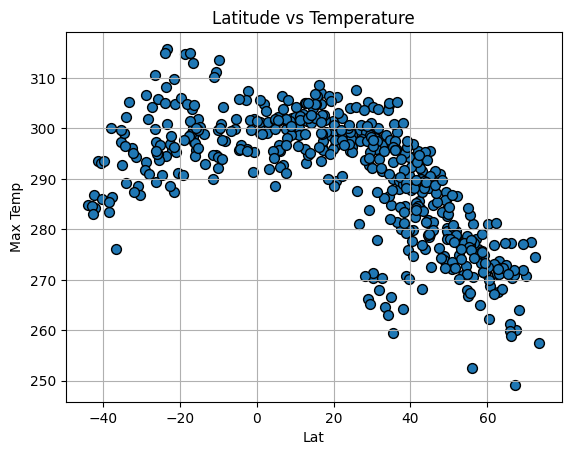

In [67]:
# Build scatter plot for latitude vs. temperature
# Incorporate the other graph properties
city_data_df.plot.scatter(x='Lat', y='Max Temp', title='Latitude vs Temperature', edgecolor='black', s=50).grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

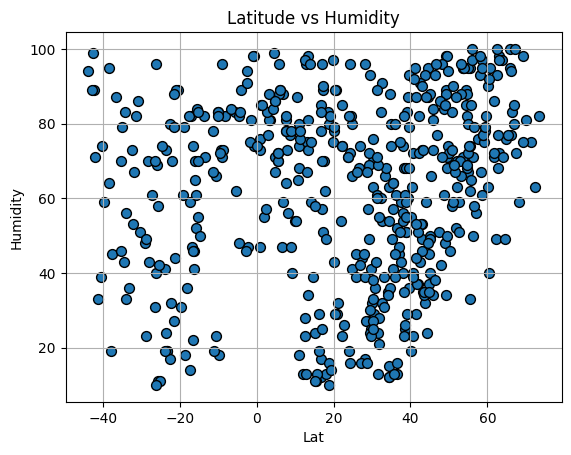

In [70]:
# Build the scatter plots for latitude vs. humidity
# Incorporate the other graph properties

city_data_df.plot.scatter(x='Lat', y='Humidity', title='Latitude vs Humidity', edgecolor='black', s=50).grid(True)
# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

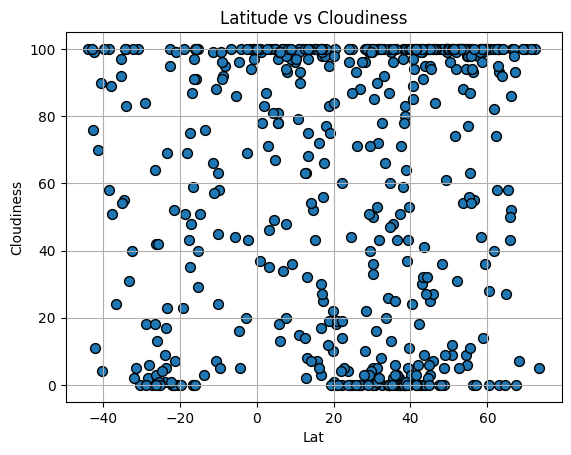

In [72]:
# Build the scatter plots for latitude vs. cloudiness
# Incorporate the other graph properties
city_data_df.plot.scatter(x='Lat', y='Cloudiness', title='Latitude vs Cloudiness', edgecolor='black', s=50).grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

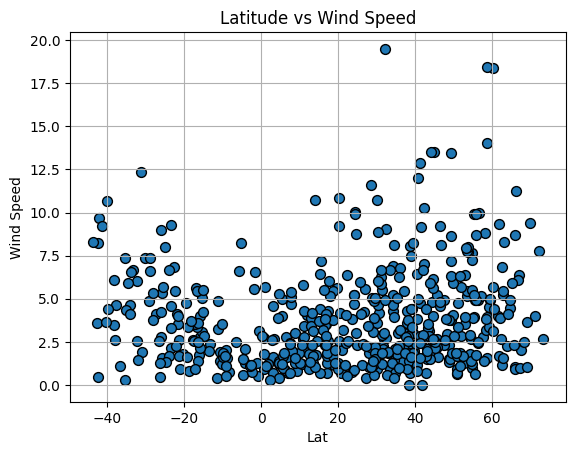

In [74]:
# Build the scatter plots for latitude vs. wind speed
# YOUR CODE HERE

# Incorporate the other graph properties
city_data_df.plot.scatter(x='Lat', y='Wind Speed', title='Latitude vs Wind Speed', edgecolor='black', s=50).grid(True)


# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [ ]:
# Define a function to create Linear Regression plots
# YOUR CODE HERE

In [77]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
# YOUR CODE HERE
northern_hemi_df = city_data_df.loc[city_data_df['Lat']>=0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country
City_ID,,,,,,,,
1,guateque,4.6700,-73.4211,288.59,86,100,1.22,CO
3,iqaluit,73.4561,-82.3580,257.56,82,5,2.64,CA
5,anadyr,70.0649,179.8555,270.85,81,100,9.41,RU
6,nikolayevsk-on-amure,53.6531,139.0653,271.03,70,54,5.16,RU
8,san andros,23.6835,-78.2995,299.69,71,4,3.85,BS


In [78]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
# YOUR CODE HERE
southern_hemi_df = city_data_df.loc[city_data_df['Lat']<0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country
City_ID,,,,,,,,
0,albany,-34.0290,118.9807,289.24,56,100,4.65,AU
2,tual,-5.6691,132.6724,299.97,83,44,6.59,ID
4,leava,-15.4123,-179.6290,299.57,84,100,5.04,FJ
7,yeppoon,-21.9752,151.4558,295.82,70,0,4.12,AU
12,chapeco,-27.2280,-52.5424,304.23,61,0,4.12,BR


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.7911928780651291


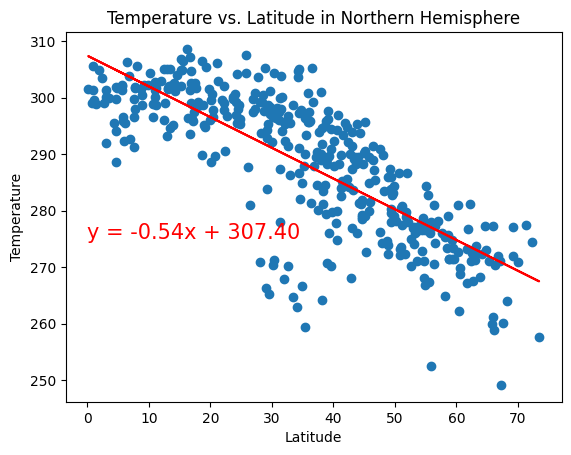

In [119]:
# Linear regression on Northern Hemisphere
(m,b, rvalue, pvalue, stderr) = st.linregress(northern_hemi_df['Lat'],northern_hemi_df['Max Temp'])

print(f'The r-value is: {rvalue}')

predictions = m*northern_hemi_df['Lat']+b

plt.plot(northern_hemi_df['Lat'],predictions, color = 'red')
plt.scatter(northern_hemi_df['Lat'],northern_hemi_df['Max Temp'])
plt.title("Temperature vs. Latitude in Northern Hemisphere")
plt.xlabel("Latitude")
plt.ylabel("Temperature")
plt.text(0,275,f'y = {m:.2f}x + {b:.2f}', fontsize=15,color='red')
plt.show()



The r-value is: 0.40675042148475893


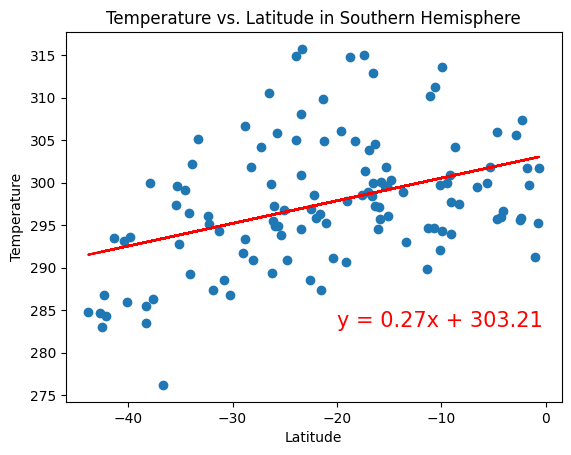

In [120]:
# Linear regression on Southern Hemisphere
(m,b, rvalue, pvalue, stderr) = st.linregress(southern_hemi_df['Lat'],southern_hemi_df['Max Temp'])

print(f'The r-value is: {rvalue}')

predictions = m*southern_hemi_df['Lat']+b

plt.plot(southern_hemi_df['Lat'],predictions, color = 'red')
plt.scatter(southern_hemi_df['Lat'],southern_hemi_df['Max Temp'])
plt.title("Temperature vs. Latitude in Southern Hemisphere")
plt.xlabel("Latitude")
plt.ylabel("Temperature")
plt.text(-20,283,f'y = {m:.2f}x + {b:.2f}', fontsize=15,color='red')
plt.show()

**Discussion about the linear relationship:** 


Based on the provided linear regression results for the Northern Hemisphere and the Southern Hemisphere in Latitude vs Temperature, we can draw the following conclusions:

**Northern Hemisphere:**
- Linear Regression Equation: y = -0.54x + 307.4
- R-Value: -0.7911

The negative sign of the R-value (-0.7911) indicates a strong negative linear relationship between latitude and temperature in the Northern Hemisphere. As latitude increases (moving away from the equator towards the poles), the temperature tends to decrease significantly. This is a robust and statistically significant relationship, with a high degree of predictability.

**Southern Hemisphere:**
- Linear Regression Equation: y = 0.27x + 303.21
- R-Value: 0.4067

The positive sign of the R-value (0.4067) suggests a weak positive linear relationship between latitude and temperature in the Southern Hemisphere. As latitude increases (moving towards the South Pole), temperature tends to increase, but the relationship is relatively weak. Other factors likely play a more significant role in determining temperature in this region. The R-value indicates that the correlation is positive but not very strong.

In summary, the linear regression results reveal that the relationship between latitude and temperature differs between the Northern and Southern Hemispheres:

- In the Northern Hemisphere, there is a strong negative correlation, with temperatures generally decreasing as you move further from the equator.

- In the Southern Hemisphere, there is a weaker positive correlation, with temperatures tending to increase as you move closer to the equator, but the relationship is less pronounced and less predictable.

It's important to note that these conclusions are specific to the dataset and region under consideration, and other local factors may also influence temperature patterns.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.19075152056399286


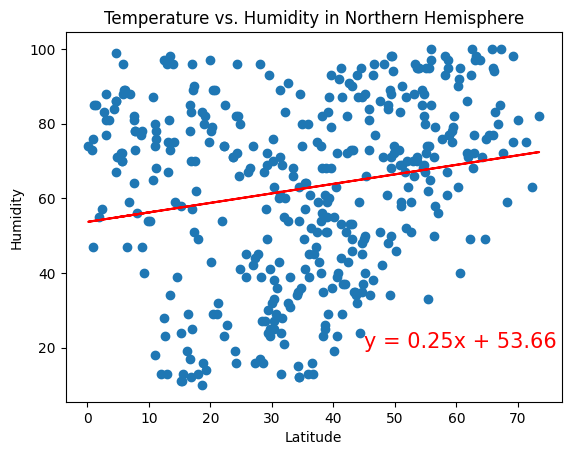

In [123]:
# Northern Hemisphere
(m,b, rvalue, pvalue, stderr) = st.linregress(northern_hemi_df['Lat'],northern_hemi_df['Humidity'])

print(f'The r-value is: {rvalue}')

predictions = m*northern_hemi_df['Lat']+b

plt.plot(northern_hemi_df['Lat'],predictions, color = 'red')
plt.scatter(northern_hemi_df['Lat'],northern_hemi_df['Humidity'])
plt.title("Temperature vs. Humidity in Northern Hemisphere")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.text(45,20,f'y = {m:.2f}x + {b:.2f}', fontsize=15,color='red')
plt.show()

The r-value is: 0.1527839481085857


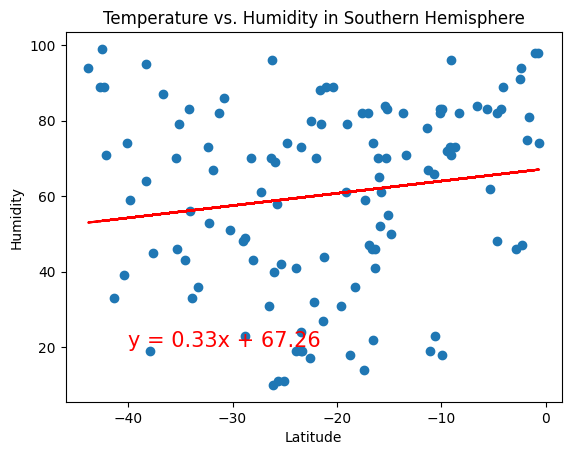

In [125]:
# Southern Hemisphere
(m,b, rvalue, pvalue, stderr) = st.linregress(southern_hemi_df['Lat'],southern_hemi_df['Humidity'])

print(f'The r-value is: {rvalue}')

predictions = m*southern_hemi_df['Lat']+b

plt.plot(southern_hemi_df['Lat'],predictions, color = 'red')
plt.scatter(southern_hemi_df['Lat'],southern_hemi_df['Humidity'])
plt.title("Temperature vs. Humidity in Southern Hemisphere")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.text(-40,20,f'y = {m:.2f}x + {b:.2f}', fontsize=15,color='red')
plt.show()

**Discussion about the linear relationship:**

Based on the provided linear regression results for the Northern Hemisphere and the Southern Hemisphere with latitude (x) and humidity (y), we can draw the following conclusions:

**Northern Hemisphere:**
- Linear Regression Equation: y = 0.25x + 53.66
- R-Value: 0.1907

In the Northern Hemisphere, the positive R-value of 0.1907 indicates a very weak positive linear relationship between latitude and humidity. While there is a positive correlation, it is quite weak, and the relationship between latitude and humidity is not strongly pronounced. Other factors, such as local climate, proximity to bodies of water, and weather patterns, likely play a more significant role in determining humidity levels in this region.

**Southern Hemisphere:**
- Linear Regression Equation: y = 0.33x + 67.26
- R-Value: 0.1527

In the Southern Hemisphere, a positive R-value of 0.1527 also suggests a very weak positive linear relationship between latitude and humidity. Similar to the Northern Hemisphere, the correlation is quite weak, and the latitude alone does not provide a strong predictive power for humidity levels. Other local and regional factors influence humidity in this part of the world.

In summary, the linear regression results reveal that there is a weak positive correlation between latitude and humidity in both the Northern and Southern Hemispheres, but the relationship is not strong. Humidity is affected by a multitude of local and regional factors, and latitude alone does not serve as a robust predictor of humidity levels in these regions.

It's essential to consider these results in the context of the specific dataset and to recognize that other factors can play a more significant role in determining humidity levels in different geographic locations.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.04052494182497745


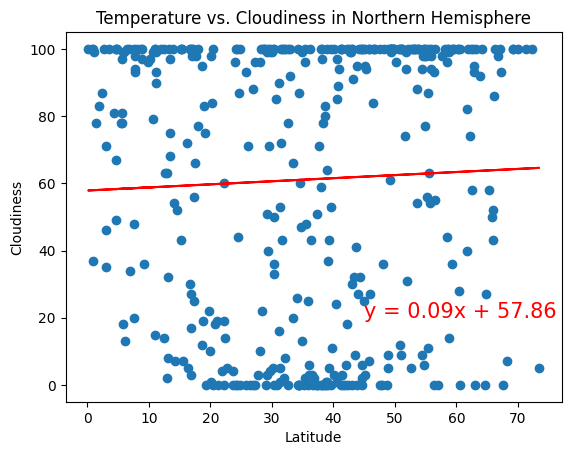

In [126]:
# Northern Hemisphere
(m,b, rvalue, pvalue, stderr) = st.linregress(northern_hemi_df['Lat'],northern_hemi_df['Cloudiness'])

print(f'The r-value is: {rvalue}')

predictions = m*northern_hemi_df['Lat']+b

plt.plot(northern_hemi_df['Lat'],predictions, color = 'red')
plt.scatter(northern_hemi_df['Lat'],northern_hemi_df['Cloudiness'])
plt.title("Temperature vs. Cloudiness in Northern Hemisphere")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.text(45,20,f'y = {m:.2f}x + {b:.2f}', fontsize=15,color='red')
plt.show()

The r-value is: 0.11360422863345773


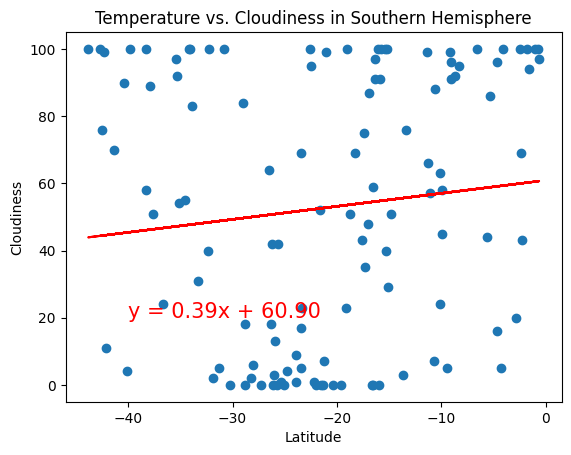

In [127]:
# Southern Hemisphere
(m,b, rvalue, pvalue, stderr) = st.linregress(southern_hemi_df['Lat'],southern_hemi_df['Cloudiness'])

print(f'The r-value is: {rvalue}')

predictions = m*southern_hemi_df['Lat']+b

plt.plot(southern_hemi_df['Lat'],predictions, color = 'red')
plt.scatter(southern_hemi_df['Lat'],southern_hemi_df['Cloudiness'])
plt.title("Temperature vs. Cloudiness in Southern Hemisphere")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.text(-40,20,f'y = {m:.2f}x + {b:.2f}', fontsize=15,color='red')
plt.show()

**Discussion about the linear relationship:** 

Based on the provided linear regression results for the Northern Hemisphere and the Southern Hemisphere with latitude (x) and cloudiness (y), we can draw the following conclusions:

**Northern Hemisphere:**
- Linear Regression Equation: y = 0.09x + 57.86
- R-Value: 0.0405

In the Northern Hemisphere, the very low R-value of 0.0405 suggests an extremely weak positive linear relationship between latitude and cloudiness. This implies that there is a nearly negligible correlation between latitude and cloudiness in the Northern Hemisphere. The latitude alone does not provide a meaningful predictive factor for cloudiness levels in this region.

**Southern Hemisphere:**
- Linear Regression Equation: y = 0.39x + 60.90
- R-Value: 0.1136

In the Southern Hemisphere, the R-value of 0.1136 indicates a weak positive linear relationship between latitude and cloudiness. While the correlation is still weak, there is a slightly more pronounced relationship compared to the Northern Hemisphere. However, the predictive power of latitude for cloudiness remains limited in the Southern Hemisphere.

In summary, the linear regression results suggest that there is little to no significant correlation between latitude and cloudiness in both the Northern and Southern Hemispheres. Other local and regional factors, such as weather patterns, geography, and local topography, likely have a more substantial influence on cloudiness levels in these regions. Latitude alone is not a strong predictor of cloudiness in these geographic areas.

These conclusions should be considered within the context of the specific dataset and the complex nature of cloudiness patterns influenced by various local and regional factors.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.23670035123397548


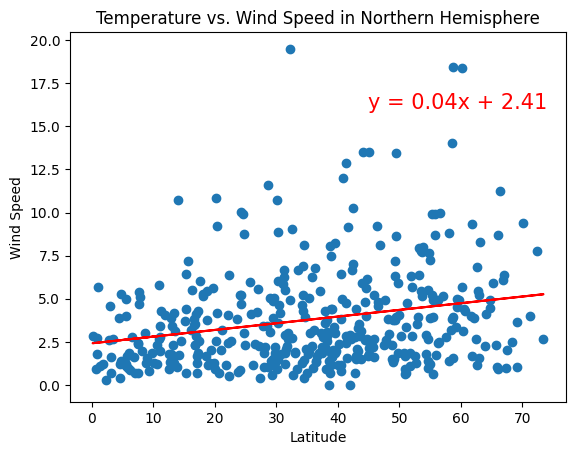

In [129]:
# Northern Hemisphere
(m,b, rvalue, pvalue, stderr) = st.linregress(northern_hemi_df['Lat'],northern_hemi_df['Wind Speed'])

print(f'The r-value is: {rvalue}')

predictions = m*northern_hemi_df['Lat']+b

plt.plot(northern_hemi_df['Lat'],predictions, color = 'red')
plt.scatter(northern_hemi_df['Lat'],northern_hemi_df['Wind Speed'])
plt.title("Temperature vs. Wind Speed in Northern Hemisphere")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.text(45,16,f'y = {m:.2f}x + {b:.2f}', fontsize=15,color='red')
plt.show()

The r-value is: -0.4376016695437464


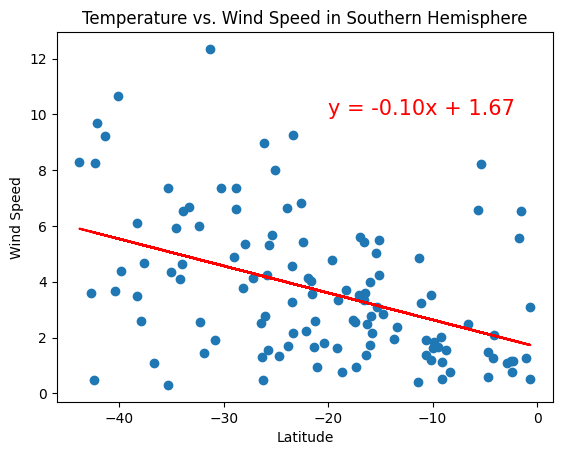

In [131]:
# Southern Hemisphere
(m,b, rvalue, pvalue, stderr) = st.linregress(southern_hemi_df['Lat'],southern_hemi_df['Wind Speed'])

print(f'The r-value is: {rvalue}')

predictions = m*southern_hemi_df['Lat']+b

plt.plot(southern_hemi_df['Lat'],predictions, color = 'red')
plt.scatter(southern_hemi_df['Lat'],southern_hemi_df['Wind Speed'])
plt.title("Temperature vs. Wind Speed in Southern Hemisphere")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.text(-20,10,f'y = {m:.2f}x + {b:.2f}', fontsize=15,color='red')
plt.show()

**Discussion about the linear relationship:** 

Based on the provided linear regression results for the Northern Hemisphere and the Southern Hemisphere with latitude (x) and wind speed (y), we can draw the following conclusions:

**Northern Hemisphere:**
- Linear Regression Equation: y = 0.04x + 2.41
- R-Value: 0.2367

In the Northern Hemisphere, the positive R-value of 0.2367 suggests a weak positive linear relationship between latitude and wind speed. As latitude increases (moving away from the equator towards the poles), wind speed tends to increase, but the correlation is relatively weak. Other local and regional factors, such as geographical features and weather patterns, likely have a more significant impact on wind speed in this region.

**Southern Hemisphere:**
- Linear Regression Equation: y = -0.10x + 1.67
- R-Value: -0.4376

In the Southern Hemisphere, the negative R-value of -0.4376 indicates a weak negative linear relationship between latitude and wind speed. As latitude increases (moving away from the equator towards the South Pole), wind speed tends to decrease, but, similar to the Northern Hemisphere, the correlation is relatively weak. Local factors play a substantial role in determining wind speed in the Southern Hemisphere.

In summary, the linear regression results suggest that there are weak linear relationships between latitude and wind speed in both the Northern and Southern Hemispheres. While there are trends of increasing wind speed in the Northern Hemisphere and decreasing wind speed in the Southern Hemisphere as one moves away from the equator, the relationships are not particularly strong. Other local and regional factors, including terrain, weather systems, and proximity to bodies of water, significantly influence wind speed patterns in these regions.

It's important to consider these conclusions in the context of the specific dataset and the many variables that affect wind speed.